# 1. Data Preprocessing

## 1) Import the data 

In [1]:
import pickle
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
%matplotlib inline

In [2]:
merged_data_path = '/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/MergedData.pickle'
with open(merged_data_path, "rb") as fr:
    data = pickle.load(fr)
    

data.head(20)

,time,x_acc,y_acc,x_dis,y_dis
0,0.0000,0.003036,0.003695,-5.500000,-6.187500
1,0.0001,0.003365,0.003365,-5.500000,-6.179688
2,0.0002,-0.000909,0.003036,-5.507812,-6.191406
3,0.0003,0.003036,-0.001896,-5.496094,-6.179688
4,0.0004,0.002708,0.003036,-5.503906,-6.183594
5,0.0005,0.002378,0.003036,-5.503906,-6.187500
6,0.0006,0.003036,0.003036,-5.500000,-6.179688
7,0.0007,0.003695,0.001064,-5.507812,-6.187500
8,0.0008,0.002708,0.003695,-5.500000,-6.179688
9,0.0009,0.002708,0.003036,-5.503906,-6.183594


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661370000 entries, 0 to 661369999
Data columns (total 5 columns):
time     float64
x_acc    float16
y_acc    float16
x_dis    float16
y_dis    float16
dtypes: float16(4), float64(1)
memory usage: 9.9 GB


## 2) Visualization (Simple)

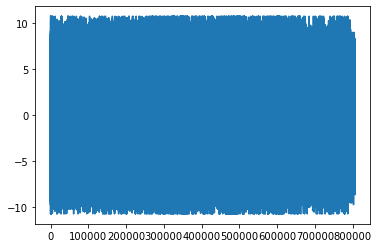

In [4]:
plt.plot(data['time'], data['x_acc'])

In [6]:
# pandas dataframe → spark dataframe
import time

spark = SparkSession.builder.getOrCreate() # initialize SparkSession

split_num = 200000
df_spark_1 = []

for i in range((len(data) // split_num)//3):
    df_spark_1.append(spark.createDataFrame(data[split_num * i : split_num * (i+1)]))
    print(str(i+1) + " / " + str(len(data) // split_num) + "완료.")
    time.sleep(1)

df_spark_1.append(spark.createDataFrame(data[(len(data) // split_num) - 1:]))

1 / 3306완료.
2 / 3306완료.
3 / 3306완료.
4 / 3306완료.
5 / 3306완료.
6 / 3306완료.
7 / 3306완료.
8 / 3306완료.
9 / 3306완료.
10 / 3306완료.
11 / 3306완료.
12 / 3306완료.
13 / 3306완료.
14 / 3306완료.
15 / 3306완료.
16 / 3306완료.
17 / 3306완료.
18 / 3306완료.
19 / 3306완료.
20 / 3306완료.
21 / 3306완료.
22 / 3306완료.
23 / 3306완료.
24 / 3306완료.
25 / 3306완료.
26 / 3306완료.
27 / 3306완료.
28 / 3306완료.
29 / 3306완료.
30 / 3306완료.
31 / 3306완료.
32 / 3306완료.
33 / 3306완료.
34 / 3306완료.
35 / 3306완료.
36 / 3306완료.
37 / 3306완료.
38 / 3306완료.
39 / 3306완료.
40 / 3306완료.
41 / 3306완료.
42 / 3306완료.
43 / 3306완료.
44 / 3306완료.
45 / 3306완료.
46 / 3306완료.
47 / 3306완료.
48 / 3306완료.
49 / 3306완료.
50 / 3306완료.
51 / 3306완료.
52 / 3306완료.
53 / 3306완료.
54 / 3306완료.
55 / 3306완료.
56 / 3306완료.
57 / 3306완료.
58 / 3306완료.
59 / 3306완료.
60 / 3306완료.
61 / 3306완료.
62 / 3306완료.
63 / 3306완료.
64 / 3306완료.
65 / 3306완료.
66 / 3306완료.
67 / 3306완료.
68 / 3306완료.
69 / 3306완료.
70 / 3306완료.
71 / 3306완료.
72 / 3306완료.
73 / 3306완료.


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.readRDDFromFile.
: java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.api.python.PythonRDD$.readRDDFromInputStream(PythonRDD.scala:188)
	at org.apache.spark.api.python.PythonRDD$.readRDDFromFile(PythonRDD.scala:175)
	at org.apache.spark.api.python.PythonRDD.readRDDFromFile(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor15.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [ ]:
split_num = 200000
df_spark_2 = []

for i in range((len(data) // split_num)//3, 2*((len(data) // split_num)//3) ):
    df_spark_2.append(spark.createDataFrame(data[split_num * i : split_num * (i+1)]))
    print(str(i+1) + " / " + str(len(data) // split_num) + "완료.")
    time.sleep(1)

df_spark_2.append(spark.createDataFrame(data[(len(data) // split_num) - 1:]))

In [ ]:
split_num = 200000
df_spark_3 = []

for i in range(2*((len(data) // split_num)//3), (len(data) // split_num) ):
    df_spark_3.append(spark.createDataFrame(data[split_num * i : split_num * (i+1)]))
    print(str(i+1) + " / " + str(len(data) // split_num) + "완료.")
    time.sleep(1)

df_spark_3.append(spark.createDataFrame(data[(len(data) // split_num) - 1:]))

## 2) Visualization

In [ ]:
g = sb.PairGrid(data=data, vars=['x_acc', 'y_acc', 'x_dis', 'y_dis'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

KeyboardInterrupt: 

In [12]:
# pandas dataframe → spark dataframe
import time

spark = SparkSession.builder.getOrCreate() # initialize SparkSession

split_num = 200000
df_spark = []

for i in range(len(data) // split_num):
    df_spark.append(spark.createDataFrame(data[split_num * i : split_num * (i+1)]))
    print(str(i+1) + " / " + str(len(data) // split_num) + "완료.")
    time.sleep(1)

df_spark.append(spark.createDataFrame(data[(len(data) // split_num) - 1:]))

1 / 3306완료.
2 / 3306완료.
3 / 3306완료.
4 / 3306완료.
5 / 3306완료.
6 / 3306완료.
7 / 3306완료.
8 / 3306완료.
9 / 3306완료.
10 / 3306완료.
11 / 3306완료.
12 / 3306완료.
13 / 3306완료.
14 / 3306완료.
15 / 3306완료.
16 / 3306완료.
17 / 3306완료.
18 / 3306완료.
19 / 3306완료.
20 / 3306완료.
21 / 3306완료.
22 / 3306완료.
23 / 3306완료.
24 / 3306완료.
25 / 3306완료.
26 / 3306완료.
27 / 3306완료.
28 / 3306완료.
29 / 3306완료.
30 / 3306완료.
31 / 3306완료.
32 / 3306완료.
33 / 3306완료.
34 / 3306완료.
35 / 3306완료.
36 / 3306완료.
37 / 3306완료.
38 / 3306완료.
39 / 3306완료.
40 / 3306완료.
41 / 3306완료.
42 / 3306완료.
43 / 3306완료.
44 / 3306완료.
45 / 3306완료.
46 / 3306완료.
47 / 3306완료.
48 / 3306완료.
49 / 3306완료.
50 / 3306완료.
51 / 3306완료.
52 / 3306완료.
53 / 3306완료.
54 / 3306완료.
55 / 3306완료.
56 / 3306완료.
57 / 3306완료.
58 / 3306완료.
59 / 3306완료.
60 / 3306완료.
61 / 3306완료.
62 / 3306완료.
63 / 3306완료.
64 / 3306완료.
65 / 3306완료.
66 / 3306완료.
67 / 3306완료.
68 / 3306완료.
69 / 3306완료.
70 / 3306완료.
71 / 3306완료.
72 / 3306완료.
73 / 3306완료.
74 / 3306완료.
75 / 3306완료.
76 / 3306완료.
77 / 3306완료.
78 / 330

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.readRDDFromFile.
: java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.api.python.PythonRDD$.readRDDFromInputStream(PythonRDD.scala:188)
	at org.apache.spark.api.python.PythonRDD$.readRDDFromFile(PythonRDD.scala:175)
	at org.apache.spark.api.python.PythonRDD.readRDDFromFile(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor15.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [ ]:
df_spark.show()
df_spark.printSchema()

## 2) Assemble the features with VectorAssembler

In [8]:
vecAssembler = VectorAssembler(inputCols=[], outputCol='features')
assembledDF = vecAssembler.transform(df_spark)
assembledDF.show(10)

AttributeError: 'DataFrame' object has no attribute 'show'

## 3) Fit the K-means model

In [ ]:
kmeans = KMeans(k=3, seed=2021)
model = kmeans.fit(assembledDF.select('features'))

## 4) Transform initial dataframe to include cluster assignments

In [ ]:
clusteredDF = model.transform(assembledDF)
clusteredDF.show(20)